/tmp/ipykernel_3566385/3415754718.py:49: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


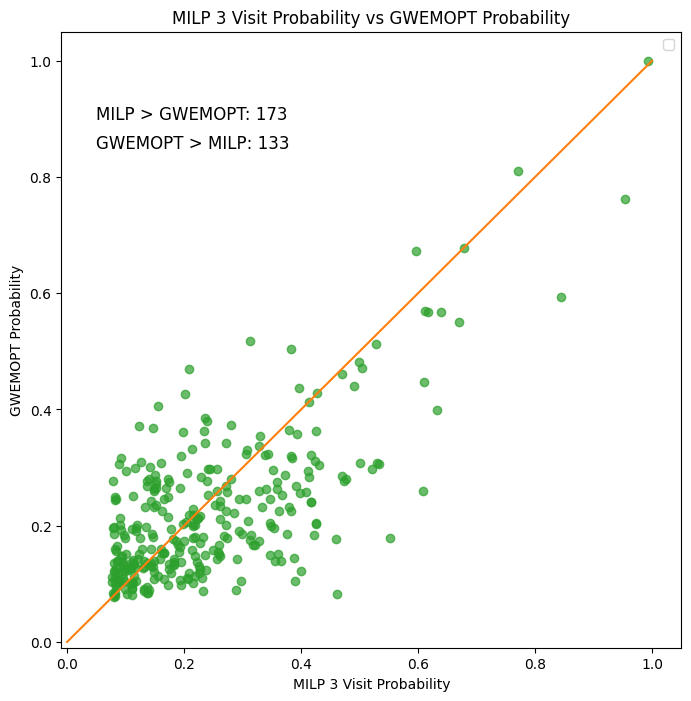

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
csv_file = "/u/ywagh/extracted_data.csv"
df = pd.read_csv(csv_file)

# Convert probability columns to numeric, replacing missing values with 0.0
df["GWEMOPT Prob"] = pd.to_numeric(df["GWEMOPT Prob"], errors="coerce").fillna(0.0)
df["MILP-3"] = pd.to_numeric(df["MILP-3"], errors="coerce").fillna(0.0)

# Filter for probabilities greater than 0.05
valid_df = df[(df["GWEMOPT Prob"] > 0.075) & (df["MILP-3"] > 0.075) & (df["GWEMOPT Prob"] < 1.0) & (df["MILP-3"] < 1.0)]

# Set tolerance threshold for filtering near y = x
tolerance = 0.30  # Adjust as needed
near_xy_line = abs(valid_df["MILP-3"] - valid_df["GWEMOPT Prob"]) <= tolerance
near_points = valid_df[near_xy_line]

# Select 5% of the total points that are far from y = x
far_points = valid_df[~near_xy_line].sample(frac=0.15, random_state=42)  # Random selection

# Compute counts for additional metrics
milp_greater = (near_points["MILP-3"] > near_points["GWEMOPT Prob"]).sum()
gwemopt_greater = (near_points["GWEMOPT Prob"] > near_points["MILP-3"]).sum()

# Plot the data
plt.figure(figsize=(8, 8))
plt.scatter(near_points["MILP-3"], near_points["GWEMOPT Prob"], alpha=0.7,  color="C2")
plt.scatter(far_points["MILP-3"], far_points["GWEMOPT Prob"], alpha=0.7,  color="C2")

plt.xlabel("MILP 3 Visit Probability")
plt.ylabel("GWEMOPT Probability")
plt.title("MILP 3 Visit Probability vs GWEMOPT Probability")

# Add y = x reference line
x = np.linspace(0, 1, 100)
plt.plot(x, x, color="C1", linestyle="-")

# Add text annotations for additional metrics
plt.text(0.05, 0.9, f"MILP > GWEMOPT: {milp_greater}", fontsize=12)
plt.text(0.05, 0.85, f"GWEMOPT > MILP: {gwemopt_greater}", fontsize=12)

# Set axis limits
plt.xlim(-0.01, 1.05)
plt.ylim(-0.01, 1.05)

plt.legend()
plt.grid(False)
plt.show()


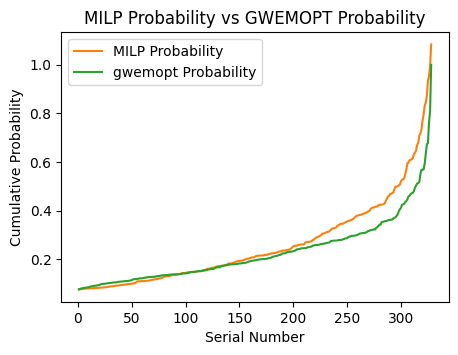

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/u/ywagh/extracted_data.csv")
df["GWEMOPT Prob"] = pd.to_numeric(df["GWEMOPT Prob"], errors="coerce").fillna(0.0)
df["MILP-3"] = pd.to_numeric(df["MILP-3"], errors="coerce").fillna(0.0)
filtered_df = df[(df["GWEMOPT Prob"] > 0.075) & (df["MILP-3"] > 0.075)]
milp_sorted = filtered_df["MILP-3"].sort_values().reset_index(drop=True)
gwemopt_sorted = filtered_df["GWEMOPT Prob"].sort_values().reset_index(drop=True)
serial_numbers = range(1, len(milp_sorted) + 1)
plt.figure(figsize=(5, 3.5))
plt.plot(serial_numbers, milp_sorted, linestyle='-', color='C1', label='MILP Probability')
plt.plot(serial_numbers, gwemopt_sorted,linestyle='-', color='C2', label='gwemopt Probability')
plt.xlabel("Serial Number")
plt.ylabel("Cumulative Probability")
plt.title("MILP Probability vs GWEMOPT Probability")
plt.legend()
plt.grid(False)
plt.show()

/tmp/ipykernel_3566385/4037770622.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['milp_3_normalized'] = filtered_df['MILP-3'] / filtered_df['MILP-1']
/tmp/ipykernel_3566385/4037770622.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['gwemopt_normalized'] = filtered_df['GWEMOPT Prob'] / filtered_df['MILP-1']


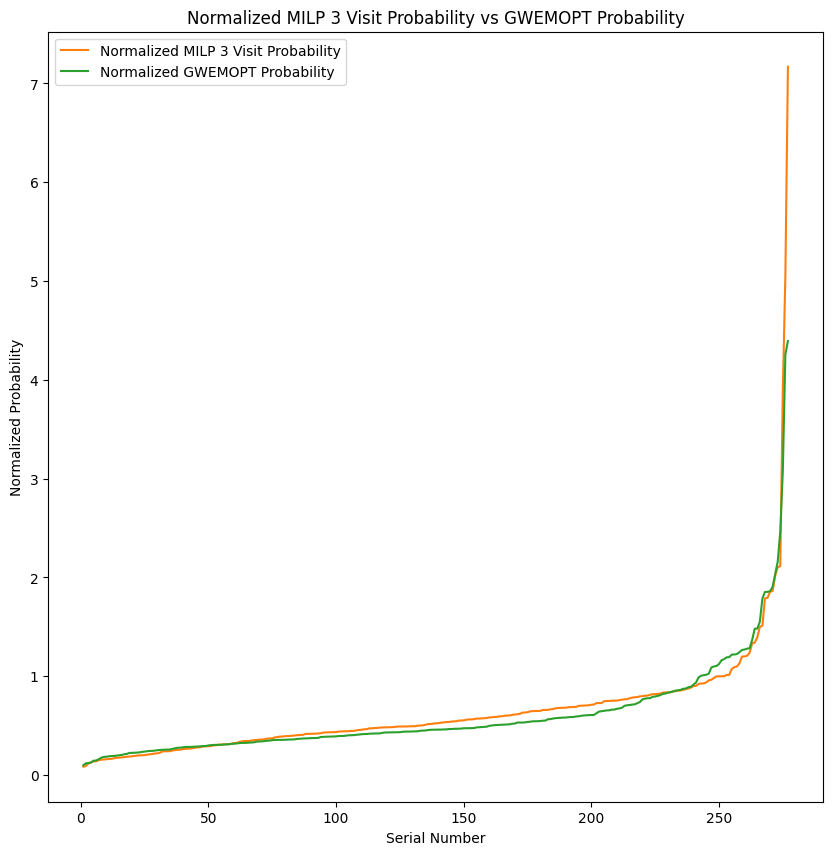

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/u/ywagh/extracted_data.csv")
df["GWEMOPT Prob"] = pd.to_numeric(df["GWEMOPT Prob"], errors="coerce").fillna(0.0)
df["MILP-3"] = pd.to_numeric(df["MILP-3"], errors="coerce").fillna(0.0)
df["MILP-1"] = pd.to_numeric(df["MILP-1"], errors="coerce").fillna(0.0)
filtered_df = df[(df["GWEMOPT Prob"] > 0.1) & (df["MILP-3"] > 0.075) & (df["MILP-1"] > 0.075)]
filtered_df['milp_3_normalized'] = filtered_df['MILP-3'] / filtered_df['MILP-1']
filtered_df['gwemopt_normalized'] = filtered_df['GWEMOPT Prob'] / filtered_df['MILP-1']
milp_normalized_sorted = filtered_df['milp_3_normalized'].sort_values().reset_index(drop=True)
gwemopt_normalized_sorted = filtered_df['gwemopt_normalized'].sort_values().reset_index(drop=True)
serial_numbers = range(1, len(milp_normalized_sorted) + 1)

plt.figure(figsize=(10, 10))
plt.plot(serial_numbers, milp_normalized_sorted,  linestyle='-', color='C1', label='Normalized MILP 3 Visit Probability')
plt.plot(serial_numbers, gwemopt_normalized_sorted,  linestyle='-', color='C2', label='Normalized GWEMOPT Probability')
plt.xlabel('Serial Number')
plt.ylabel('Normalized Probability')
plt.title('Normalized MILP 3 Visit Probability vs GWEMOPT Probability')
plt.grid(False)
plt.legend()
plt.show()

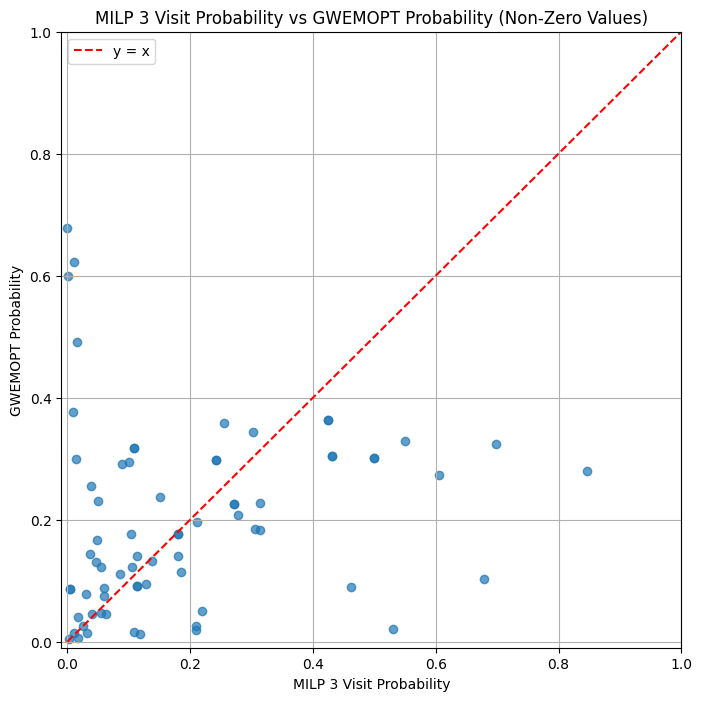

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv('/u/ywagh/scheduling_results.csv')

# Step 2: Filter rows where both probabilities are non-zero
filtered_df = df[(df['milp_3_visit_probability'] > 0) & (df['gwemopt_probability'] > 0)]

# Step 3: Plot the data
plt.figure(figsize=(8, 8))
plt.scatter(filtered_df['milp_3_visit_probability'], filtered_df['gwemopt_probability'], alpha=0.7)
plt.xlabel('MILP 3 Visit Probability')
plt.ylabel('GWEMOPT Probability')
plt.title('MILP 3 Visit Probability vs GWEMOPT Probability (Non-Zero Values)')

# Adding the y = x line
x = np.linspace(0, 1, 100)
plt.plot(x, x, color='red', linestyle='--', label='y = x')

# Setting the axis limits to [0, 1]
plt.xlim(-0.01, 1)
plt.ylim(-0.01, 1)

plt.legend()
plt.grid(True)
plt.show()


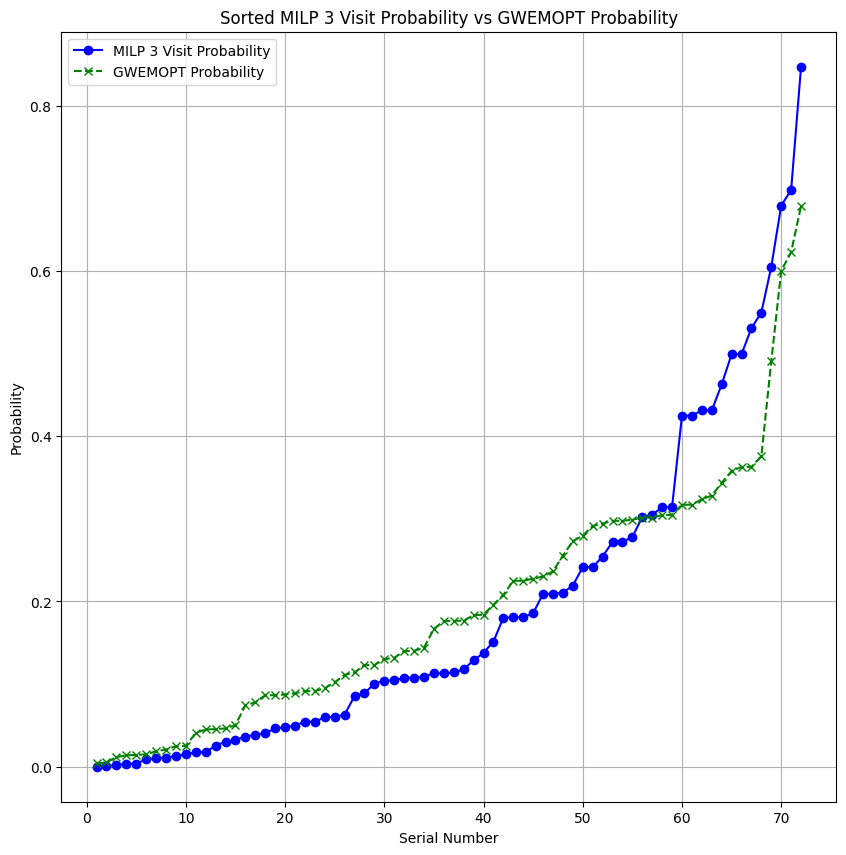

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv('/u/ywagh/scheduling_results.csv')

# Step 2: Filter rows where both probabilities are non-zero
filtered_df = df[(df['milp_3_visit_probability'] > 0) & (df['gwemopt_probability'] > 0)]

# Step 3: Sort the probabilities
milp_sorted = filtered_df['milp_3_visit_probability'].sort_values().reset_index(drop=True)
gwemopt_sorted = filtered_df['gwemopt_probability'].sort_values().reset_index(drop=True)

# Step 4: Create a serial number for the x-axis
serial_numbers = range(1, len(milp_sorted) + 1)

# Step 5: Plot both sorted probabilities on the same plot
plt.figure(figsize=(10, 10))
plt.plot(serial_numbers, milp_sorted, marker='o', linestyle='-', color='blue', label='MILP 3 Visit Probability')
plt.plot(serial_numbers, gwemopt_sorted, marker='x', linestyle='--', color='green', label='GWEMOPT Probability')
plt.xlabel('Serial Number')
plt.ylabel('Probability')
plt.title('Sorted MILP 3 Visit Probability vs GWEMOPT Probability')
plt.grid(True)
plt.legend()
plt.show()


/tmp/ipykernel_2184066/2566414567.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['milp_3_normalized'] = filtered_df['milp_3_visit_probability'] / filtered_df['milp_1_visit_probability']
/tmp/ipykernel_2184066/2566414567.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['gwemopt_normalized'] = filtered_df['gwemopt_probability'] / filtered_df['milp_1_visit_probability']


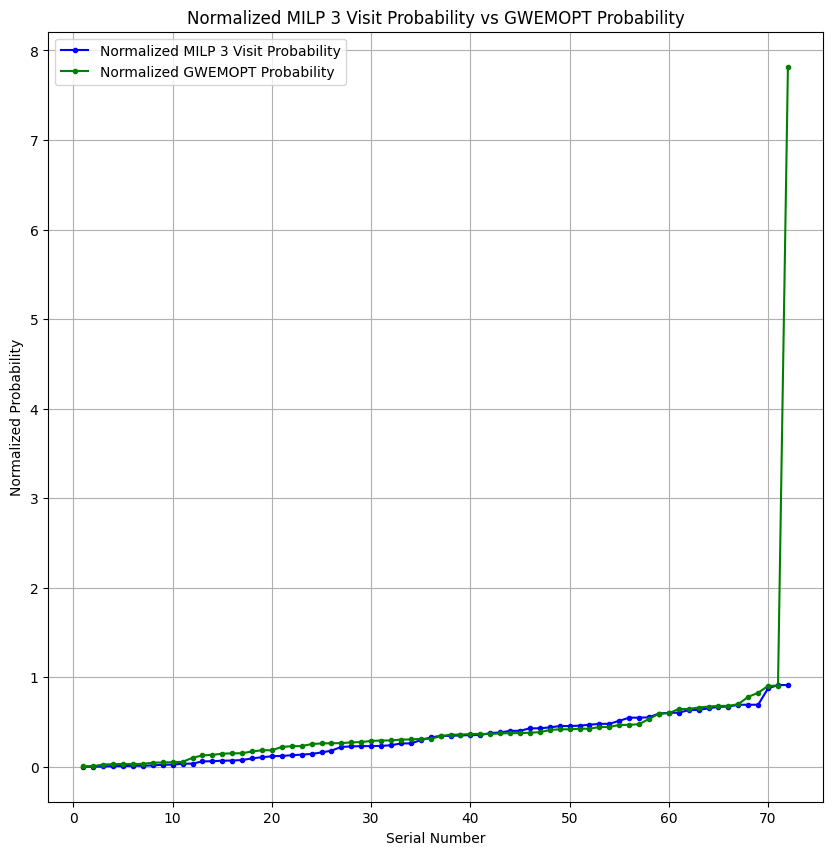

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv('/u/ywagh/scheduling_results.csv')

# Step 2: Filter rows where all probabilities are non-zero
filtered_df = df[(df['milp_1_visit_probability'] > 0) & 
                 (df['milp_3_visit_probability'] > 0) & 
                 (df['gwemopt_probability'] > 0)]

# Step 3: Normalize the probabilities with respect to milp_1_visit_probability
filtered_df['milp_3_normalized'] = filtered_df['milp_3_visit_probability'] / filtered_df['milp_1_visit_probability']
filtered_df['gwemopt_normalized'] = filtered_df['gwemopt_probability'] / filtered_df['milp_1_visit_probability']

# Step 4: Sort the normalized probabilities
milp_normalized_sorted = filtered_df['milp_3_normalized'].sort_values().reset_index(drop=True)
gwemopt_normalized_sorted = filtered_df['gwemopt_normalized'].sort_values().reset_index(drop=True)

# Step 5: Create a serial number for the x-axis
serial_numbers = range(1, len(milp_normalized_sorted) + 1)

# Step 6: Plot the normalized probabilities
plt.figure(figsize=(10, 10))
plt.plot(serial_numbers, milp_normalized_sorted, marker='.', linestyle='-', color='blue', label='Normalized MILP 3 Visit Probability')
plt.plot(serial_numbers, gwemopt_normalized_sorted, marker='.', linestyle='-', color='green', label='Normalized GWEMOPT Probability')
plt.xlabel('Serial Number')
plt.ylabel('Normalized Probability')
plt.title('Normalized MILP 3 Visit Probability vs GWEMOPT Probability')
plt.grid(True)
plt.legend()
plt.show()


In [1]:
import subprocess
import re
import astroplan
from astroplan import FixedTarget,Observer
from matplotlib.backends.backend_pdf import PdfPages
from astropy.coordinates import ICRS, SkyCoord, AltAz
from astropy import units as u
from astropy.utils.data import download_file
from astropy.table import Table, QTable, join
from astropy.time import Time
from astropy_healpix import *
from ligo.skymap import plot
from ligo.skymap.io import read_sky_map
import healpy as hp
import os
from matplotlib.pyplot import imread, figure, imshow, axis
from matplotlib import pyplot as plt
import numpy as np
from tqdm.auto import tqdm
import datetime as dt
import time
import pickle
import json
import pandas as pd
import warnings

/u/ywagh/.local/lib/python3.10/site-packages/ligo/lw/lsctables.py:89: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal


In [24]:
exam = '/u/ywagh/thousand_skymaps/skymaps/skymaps/S230919bl_bayestar.multiorder.fits'
skymap,metadata = read_sky_map(exam)

In [25]:
hpx = HEALPix(nside=256, frame=ICRS())

prob = hp.ud_grade(skymap, hpx.nside, power=-2)




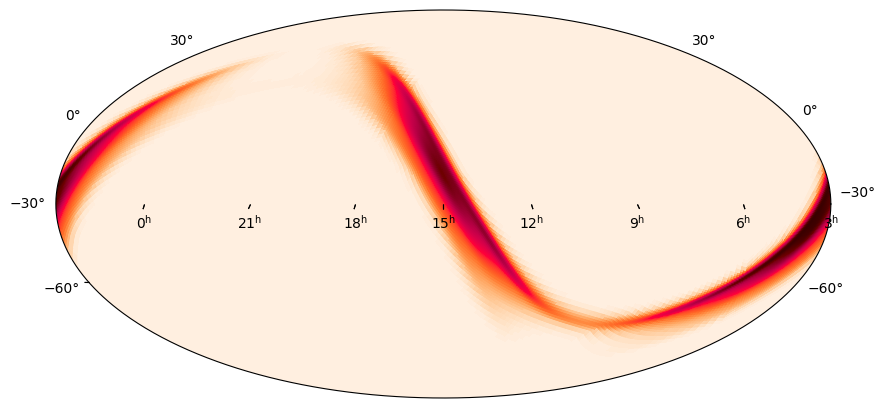

In [26]:
plt.figure(figsize=(10, 8))


ax = plt.axes(projection='astro mollweide', center='15h 30d')
ax.imshow_hpx(prob, cmap='cylon')


In [27]:
event_time = Time(metadata['gps_time'], format='gps').utc
event_time.iso



'2023-09-19 22:16:33.451'

In [28]:
metadata

OrderedDict([('MOC', True),
             ('HISTORY',
              ['',
               'Generated by calling the following Python function:',
               "ligo.skymap.bayestar.localize(event=..., waveform='o2-uberbank',",
               'f_low=15.0, min_inclination=0, max_inclination=1.5707963267948966,',
               'min_distance=None, max_distance=None, prior_distance_power=None,',
               'cosmology=False, mcmc=False, chain_dump=None, enable_snr_series=True,',
               'f_high_truncate=0.95, rescale_loglikelihood=0.83)',
               '',
               'This was the command line that started the program:',
               'gwcelery worker -l info -n gwcelery-openmp-worker-3@%h -f %n.log -Q',
               'openmp -c 1 --prefetch-multiplier 1']),
             ('objid', 'G439223'),
             ('url', 'https://gracedb.ligo.org/events/G439223'),
             ('instruments', {'H1', 'L1'}),
             ('gps_time', 1379197011.450587),
             ('gps_creation_ti